In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1337)

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [14]:
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
# create model
model = Sequential()
model.add(Dense(784, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [18]:
# Fit the model
Model = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.2391 - acc: 0.9297 - val_loss: 0.1217 - val_acc: 0.9631
Epoch 2/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0944 - acc: 0.9717 - val_loss: 0.0826 - val_acc: 0.9756
Epoch 3/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0615 - acc: 0.9817 - val_loss: 0.0794 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0436 - acc: 0.9867 - val_loss: 0.0693 - val_acc: 0.9797
Epoch 5/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0325 - acc: 0.9900 - val_loss: 0.0678 - val_acc: 0.9796
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0242 - acc: 0.9926 - val_loss: 0.0651 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.0187 - acc: 0.9944 - val_loss: 0.0610 

Total loss: 0.0847234277044
Accuracy of the test datset: 98.3


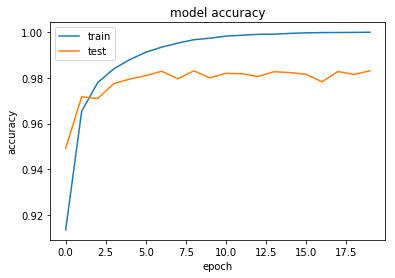

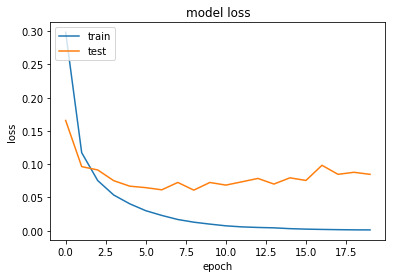

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Total loss:', score[0])
print('Accuracy of the test datset:', score[1]*100)

plt.plot(Model.history['acc'])
plt.plot(Model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()